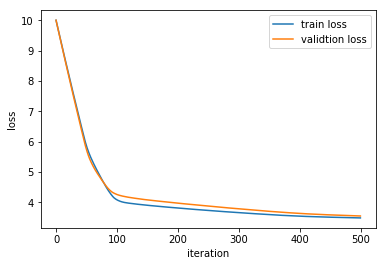

In [62]:
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import numpy
def getData():
    data = load_svmlight_file("C:/Users/YOUNA/Desktop/australian_scale.txt")
    return data[0], data[1]
def model(weigth,b,x):
    return x.dot(weight)+b;

def loss(weight,b,x,y,C):  
    weightLoss = (weight**2).sum()/2;
    pointLoss = 0;
    n = x.shape[0]
    for i in range(n):
        value = y[i]*(model(weight,b,x[i]))
        if (1-value )>=0:
            pointLoss=pointLoss+C*(1-value)/n      
    return weightLoss + pointLoss
 
def gradiendofW(weight,b,x,y,C): 
    WG=weight
    n = x.shape[0]
    for i in range(n):
        value = y[i]*(model(weight,b,x[i]))
        if (1-value )>=0:
            WG=WG-y[i]*x[i]*C/n; 
    return WG

def gradiendofB(weight,b,x,y,C): 
    WB=0
    n = x.shape[0]
    for i in range(n):
        value = y[i]*(model(weight,b,x[i]))
        if (1-value )>=0:
            WB=WB-y[i]*C/n;    
    return WB
x, y = getData()
x=x.toarray()
xTrain, xValidatuon, yTrain, yValiidation = train_test_split(x, y, test_size=0.5, random_state=42)
weight = numpy.zeros(xTrain.shape[1])
b=0;
C=10;
iteration = 500
learningRate = 0.001
trainLoss = []
validateLoss = []
for i in range(iteration):
    trainLoss.append(loss(weight,b,xTrain,yTrain,C))
    validateLoss.append(loss(weight,b,xValidatuon,yValiidation,C))
    gradofW = gradiendofW(weight,b,xTrain,yTrain,C)  
    gradofB = gradiendofB(weight,b,xTrain,yTrain,C)
    weight = weight - gradofW*learningRate
    b = b - gradofB*learningRate
   
 
plt.plot(range(iteration),trainLoss, label='train loss')
plt.plot(range(iteration),validateLoss, label='validtion loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()